# **Explainability**

### ***Loading Libraries***

In [1]:
!pip install hypertune

In [2]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00


In [3]:
!pip install tensorflow-io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 7.5 MB/s eta 0:00:00


In [4]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 7.9 MB/s eta 0:00:00


In [13]:
# Operating Systems
import os
import sys
import shutil
import pathlib
import argparse
import datetime

# SHAP
import shap

# Numerical Computing
import numpy as np

# Data Manipuation
import pandas as pd

# SciPy
import scipy
from scipy import stats
from scipy import signal
from scipy.io import wavfile

# Data Visualization
import itertools
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

# Tabulate
from tabulate import tabulate

# Hyperparameter Tuning
import hypertune

# Tools
from setuptools import setup
from setuptools import find_packages

# BigQuery
from google.cloud import bigquery
from google.colab import auth

# Scikit-Learn
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import precision_recall_fscore_support as score

# Extreme Gradient Boosting
import xgboost as xgb

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

# TensorFlow
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import Model
import tensorflow_datasets as tfds
from tensorflow_hub import KerasLayer
from tensorflow import feature_column as fc
from tensorflow.python.framework import dtypes
from tensorflow.keras.preprocessing import text
from tensorflow.keras.utils import to_categorical
from tensorflow_io.bigquery import BigQueryClient
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import callbacks, layers, models, utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Input, Flatten, Conv2D, MaxPooling2D, Lambda

# Keras API
import keras_tuner as kt

# Apache
# import apache_beam as beam
# import apache_beam.runners.interactive.interactive_beam as ib
# from apache_beam.runners.interactive import interactive_runner

# print("Apache Beam Properly Imported")

### ***Explaining Simpler Models***

In [43]:
!gsutil cp gs://ml-design-patterns/auto-mpg.csv .

data = pd.read_csv('auto-mpg.csv', na_values='?')
data = data.dropna()

Copying gs://ml-design-patterns/auto-mpg.csv...
/ [1 files][ 17.7 KiB/ 17.7 KiB]                                                
Operation completed over 1 objects/17.7 KiB.                                     


In [44]:
data = data.drop(columns=['car name'])

In [45]:
data = pd.get_dummies(data, columns=['origin'])

In [46]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,True,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,True,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,True,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,True,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,True,False,False


In [47]:
print(data.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin_1  origin_2  origin_3  
0          70      True     False     False  
1          70      True     False     False  
2          70      True     False     False  
3          70      True     False     False  
4          70      True     False     False  


In [48]:
labels = data['mpg']

data = data.drop(columns=['mpg', 'cylinders'])

In [49]:
x, y = data, labels

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
x_train = x_train.astype(float)

x_test = x_test.astype(float)

In [51]:
model = LinearRegression().fit(x_train, y_train)

In [52]:
coefficients = model.coef_

coefdf = pd.DataFrame(coefficients, index=data.columns.tolist(), columns=['Learned coefficients'])

In [53]:
coefdf

,Learned coefficients
displacement,0.013863
horsepower,-0.020341
weight,-0.006494
acceleration,0.044776
model year,0.797746
origin_1,-1.993884
origin_2,0.849980
origin_3,1.143903


### ***Feature Attributions with SHAP***

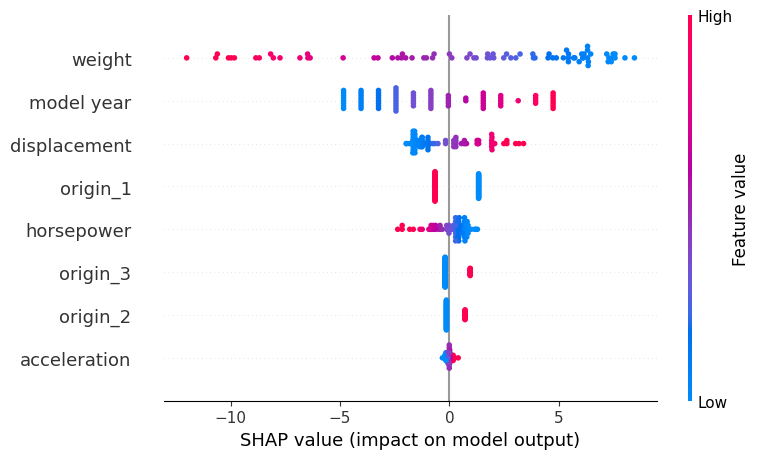

In [54]:
explainer = shap.LinearExplainer(model, x_train)

shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test)

In [55]:
shap_values[0][0]

-1.5892155634124114

In [59]:
print(explainer.expected_value)

22.773553495535584


In [65]:
print(np.shape(shap_values))

(79, 8)


In [66]:
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[0], x_test.iloc[0,:])

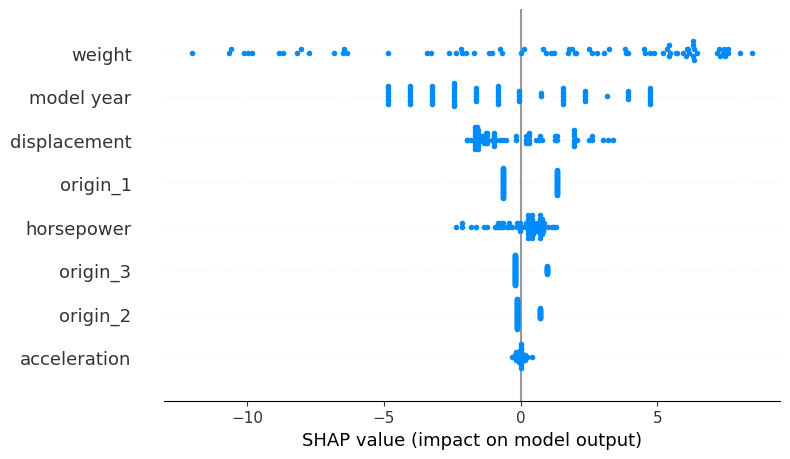

In [67]:
shap.summary_plot(shap_values, feature_names=data.columns.tolist(), class_names=['MPG'])